# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
!pip install --upgrade jupyter
!pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 385 kB 39.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 40.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 44.7 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 247 kB 48.8 MB/s eta 0:00:01
ERROR: jupyter-client 7.4.9 has requirement pyzmq>=23.0, but you'll have pyzmq 19.0.0 which is incompatible.
ERROR: jupyter-client 7.4.9 has requirement tornado>=6.2, but you'll have tornado 5.1.1 which is incompatible.
ERROR: jupyter-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: ipywidgets in /root/.local/lib/python3.7/site-packages (8.0.7)
     |████████████████████████████████| 1.1 MB 4.5 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 5.1.4 which is incompatible.
ERROR: jupyter-client 7.4.9 has requirement tornado>=6.2, but you'll have tornado 5.1.1 which is incompatible.


In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = torchvision.datasets.MNIST(root='data/train', train=True, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root='data/test', train=False, download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32)



Extracting data/train/MNIST/raw/train-images-idx3-ubyte.gz to data/train/MNIST/raw




Extracting data/train/MNIST/raw/train-labels-idx1-ubyte.gz to data/train/MNIST/raw




Extracting data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to data/train/MNIST/raw




Extracting data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/train/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



Extracting data/test/MNIST/raw/train-images-idx3-ubyte.gz to data/test/MNIST/raw




Extracting data/test/MNIST/raw/train-labels-idx1-ubyte.gz to data/test/MNIST/raw




Extracting data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to data/test/MNIST/raw




Extracting data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/test/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

1) Converting to torch tensor- 
Pytorch works on tensors, hence we need to convert the numpy array or any other PIL image into tensors. 
2) Normalization- 
Normalization is a common preprocessing step to scale the image pixels and make it easier for models to learn.
I chose mean and std deviation as 0.5

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


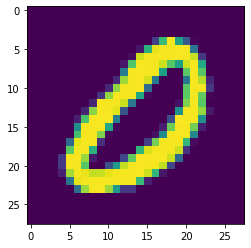

2


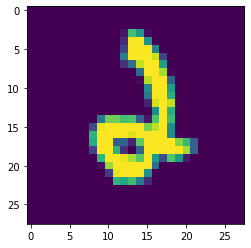

2


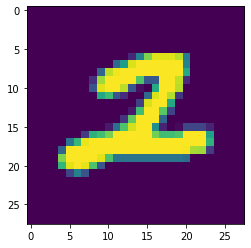

9


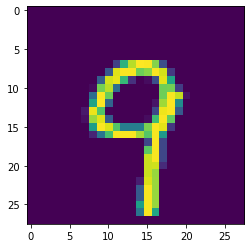

9


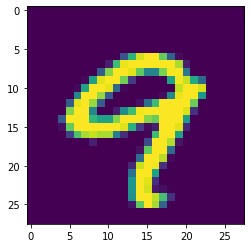

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(train_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return x

# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
num_epochs = 10

train_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_dataloader.dataset) * 100 :.2f}% training loss: {train_loss/len(train_dataloader.dataset):.5f}')
    train_loss_history.append(train_loss/len(train_dataloader.dataset))


Epoch 1 training accuracy: 51.72% training loss: 0.06712
Epoch 2 training accuracy: 56.85% training loss: 0.05792
Epoch 3 training accuracy: 57.48% training loss: 0.05657
Epoch 4 training accuracy: 57.71% training loss: 0.05606
Epoch 5 training accuracy: 57.95% training loss: 0.05564
Epoch 6 training accuracy: 58.05% training loss: 0.05538
Epoch 7 training accuracy: 58.17% training loss: 0.05517
Epoch 8 training accuracy: 58.24% training loss: 0.05503
Epoch 9 training accuracy: 58.33% training loss: 0.05485
Epoch 10 training accuracy: 58.32% training loss: 0.05480


Plot the training loss (and validation loss/accuracy, if recorded).

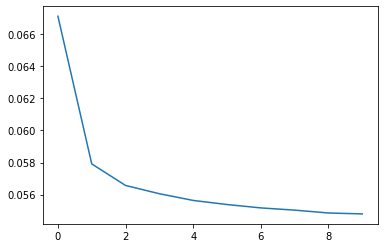

In [11]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
## YOUR CODE HERE ##
test_correct = 0
net.eval()
for inputs, labels in test_dataloader:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = net(inputs)

    _, preds = torch.max(outputs.data, 1)
    test_correct += (preds == labels).sum().item()
print(f'Test accuracy: {test_correct/len(test_dataloader.dataset) * 100:.2f}%')

## accuracy of 96.92% is achieved in hyperparameter tuning part below

Test accuracy: 56.97%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
## YOUR CODE HERE ##
model = nn.Sequential(nn.Linear(28 * 28, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      )
model.to(device)

optimizer_model = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion_model = nn.CrossEntropyLoss()

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        inputs = inputs.view(inputs.shape[0], -1)
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_model.zero_grad()

        outputs = model(inputs)
        loss = criterion_model(outputs, labels)
        loss.backward()
        optimizer_model.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_dataloader.dataset) * 100 :.2f}% training loss: {train_loss/len(train_dataloader.dataset):.5f}')

test_correct = 0
model.eval()
for inputs, labels in test_dataloader:
    inputs = inputs.view(inputs.shape[0], -1)
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)

    _, preds = torch.max(outputs.data, 1)
    test_correct += (preds == labels).sum().item()
print(f'Test accuracy: {test_correct/len(test_dataloader.dataset) * 100:.2f}%')

Epoch 1 training accuracy: 73.24% training loss: 0.02943
Epoch 2 training accuracy: 90.22% training loss: 0.01038
Epoch 3 training accuracy: 92.26% training loss: 0.00818
Epoch 4 training accuracy: 93.88% training loss: 0.00652
Epoch 5 training accuracy: 94.86% training loss: 0.00537
Epoch 6 training accuracy: 95.70% training loss: 0.00454
Epoch 7 training accuracy: 96.26% training loss: 0.00394
Epoch 8 training accuracy: 96.67% training loss: 0.00346
Epoch 9 training accuracy: 97.05% training loss: 0.00306
Epoch 10 training accuracy: 97.38% training loss: 0.00273
Test accuracy: 96.92%


## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
## YOUR CODE HERE ##
checkpoint_net = {'input_size': 28 * 28,
              'output_size': 10,
              'hidden_layers': [128,64],
              'state_dict': net.state_dict(),
              'epochs': 10,
              'optimizer_state_dict': optimizer.state_dict()}

checkpoint_model = {'input_size': 28 * 28,
              'output_size': 10,
              'hidden_layers': [256,128,64],
              'state_dict': model.state_dict(),
              'epochs': 10,
              'optimizer_state_dict': optimizer_model.state_dict()}

torch.save(checkpoint_net, 'checkpoint_net.pth')
torch.save(checkpoint_model, 'checkpoint_model.pth')
